# **Urban Sound Classification Project**

**Connect to Google drive to pull up the images**

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the necessary libraries**

In [30]:
import glob
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
from PIL import Image
import os
import sklearn

**Load the main path that has the spectrogram images, Read them and then save them to the save_path after preprocessing** **kalın metin**

In [31]:
main_read_path = "/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/*"
main_save_path = "/content/drive/MyDrive/GlobalAiHub/Preprocessed/"

# **Define a method to preprocess the spectrogram images and then save them to the desired directory**

---



In [32]:
def preprocess(read_path,save_path):
  read_path = read_path + "/*"
  path = glob.glob(read_path)
  for i, img in enumerate(path):
    #print(img)
    gray_img = cv2.imread(img,0)
    resized_img = cv2.resize(gray_img, (224,224))
    normalized_img = resized_img/255.0
    #plt.axis('off') # no axis
    #plt.imshow(normalized_img)
    #break
    a = save_path.split("/")
    #print(a[-2])
    image.imsave(f"{save_path}/{a[-2]}_{i}.png",normalized_img,cmap=plt.cm.gray)

# **Function to read the spectrogram , preprocess them and then return as list for further processing**

In [33]:
def readImagesandTargets(read_path, X, y):
  folder = read_path
  images = sorted(os.listdir(folder)) #["frame_00", "frame_01", "frame_02", ...]
  for image in images:
      im = cv2.imread(folder + "/" + image,0)
      im = cv2.resize(im,(224,224))
      X.append((im)) #.transpose(1, 0, 2))

      label = folder.split("/")
      y.append(label[-1])

  X = np.array(X)
  print(X.shape)
  return X,y

**Read the paths of the images and add them to a list**

In [34]:
read_path_list = glob.glob(main_read_path)
print(len(read_path_list))
save_path_list = glob.glob(main_save_path)
print(len(save_path_list))
read_path_list

10
1


['/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold1',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold2',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold3',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold4',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold5',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold6',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold7',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold8',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold9',
 '/content/drive/MyDrive/GlobalAiHub/Saved_Spectrogram/fold10']

** Loop into each path and read the spectrogram, preprocess and then save to the save_path directory **

In [35]:
for read_path in (read_path_list):
  #print(read_path)
  obj = read_path.split("/")
  #print(obj[-1])
  save_path = main_save_path + obj[-1] + "/"
  print(save_path)
  preprocess(read_path,save_path)

/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold1/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold2/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold3/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold4/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold5/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold6/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold7/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold8/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold9/
/content/drive/MyDrive/GlobalAiHub/Preprocessed/fold10/


** Read the X and y as list**

In [36]:
X = []
y = []
for read_path in (read_path_list):
  readImagesandTargets(read_path, X, y)
X = np.array(X)
y = np.array(y)

(873, 224, 224)
(1761, 224, 224)
(2686, 224, 224)
(3676, 224, 224)
(4613, 224, 224)
(5436, 224, 224)
(6274, 224, 224)
(7080, 224, 224)
(7896, 224, 224)
(8733, 224, 224)


In [37]:
X= X.reshape(X.shape[0], 224, 224, 1)
print(np.shape(X))

(8733, 224, 224, 1)


In [38]:
# Convert the lable to numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

# **Model Training**

**Split train and test**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_sum, y_train, y_sum = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

In [40]:
X_val, X_test, y_val, y_test = train_test_split(X_sum, y_sum, test_size=0.5, random_state=132, stratify=y_sum)

**print the size of train , valdidation and test sets**

In [41]:
print(np.shape(X_train))
print(np.shape(X_sum))
print(np.shape(X_test))
print("----------------------")
print(np.shape(y_train))
print(np.shape(y_sum))
print(np.shape(y_test))

(5239, 224, 224, 1)
(3494, 224, 224, 1)
(1747, 224, 224, 1)
----------------------
(5239,)
(3494,)
(1747,)


**Generate the model**

In [42]:
# import the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

# set the size of input image, channel, and the number of classes in the database
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_Chanel = 1
numberOfClass = 10

# set the kernel size for convoluition layer , poolsize for pooling layer, the filters used in each layers, and the dropout proportions in each layer.
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128
dropout_conv = 0.1
dropout_dense = 0.3

# Create the model
model = tf.keras.Sequential()

# add layers
# input layer
model.add(Conv2D(first_filters, kernel_size, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_Chanel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))
# first convolunional (hiden) layer
model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))
# second convoltional(hiden) layer
model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))
# fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_dense))
# output layer
model.add(Dense(numberOfClass, activation='softmax'))

# add the optimizer, the classification loss, and metric and end the model generation
optimizer = "adam"
model.compile(optimizer, loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model.summary()

print("Model generated successfully:)")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 64)    

**Train the model**

In [43]:
results = model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=16 , epochs=100)

Epoch 1/100
328/328 [==============================] - 15s 43ms/step - loss: 2.6165 - accuracy: 0.1514 - val_loss: 2.5722 - val_accuracy: 0.1546
Epoch 2/100
328/328 [==============================] - 14s 43ms/step - loss: 2.3273 - accuracy: 0.2187 - val_loss: 2.3351 - val_accuracy: 0.2095
Epoch 3/100
328/328 [==============================] - 14s 43ms/step - loss: 2.0938 - accuracy: 0.2869 - val_loss: 2.2238 - val_accuracy: 0.2181
Epoch 4/100
328/328 [==============================] - 14s 43ms/step - loss: 1.8695 - accuracy: 0.3686 - val_loss: 1.9787 - val_accuracy: 0.3738
Epoch 5/100
328/328 [==============================] - 14s 43ms/step - loss: 1.6068 - accuracy: 0.4724 - val_loss: 1.9545 - val_accuracy: 0.3600
Epoch 6/100
328/328 [==============================] - 14s 43ms/step - loss: 1.4679 - accuracy: 0.5150 - val_loss: 2.1486 - val_accuracy: 0.3074
Epoch 7/100
328/328 [==============================] - 14s 43ms/step - loss: 1.3593 - accuracy: 0.5562 - val_loss: 2.5860 - val_ac

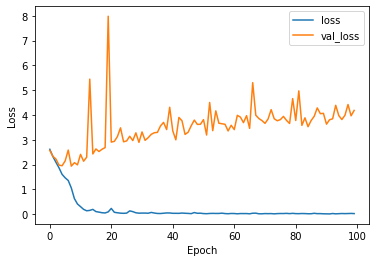

In [44]:
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Put legend table
plt.legend()

# Show the plot
plt.show()

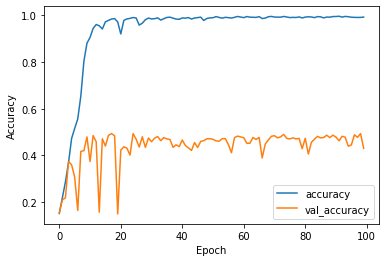

In [45]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='accuracy')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [46]:
# Evaluate the performance
model.evaluate(X_test,y_test)

55/55 [==============================] - 1s 21ms/step - loss: 4.0923 - accuracy: 0.4287


[4.092334270477295, 0.42873498797416687]

In [49]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[193].reshape(1,224,224,1))

# Print the prediction result
prediction_result
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
prediction_probability = prediction_result.max()
# Print the results
print(f'This image belongs to class {predicted_class} with {prediction_probability} probability %')

This image belongs to class 6 with 0.45207080245018005 probability %
